In [ ]:
# colab.research.google.com

# https://scikit-image.org/docs/stable/user_guide.html
# https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread

In [2]:
# Read one image and show it
img_color = imread('chair-1840011_640.jpg')
img_color.shape

(360, 640, 3)

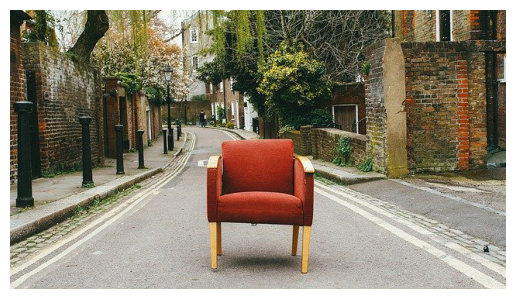

In [3]:
# Show image
plt.imshow(img_color)
plt.axis('off')
plt.show()

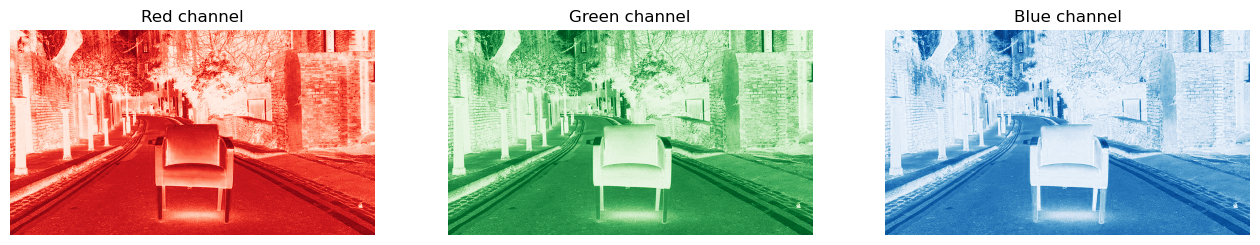

In [6]:
# Show each channel
plt.figure(figsize=(16, 3))
plt.subplot(1, 3, 1)
plt.title('Red channel')
plt.imshow(img_color[:, :, 0], cmap='Reds')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Green channel')
plt.imshow(img_color[:, :, 1], cmap='Greens')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Blue channel')
plt.imshow(img_color[:, :, 2], cmap='Blues')
plt.axis('off')
plt.show()

Notice that there is only one channel
(360, 640)


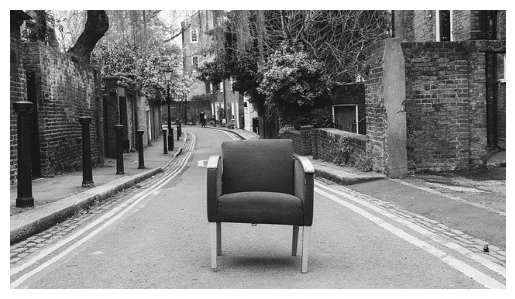

In [7]:
# Read as grayscale
img_gray = imread('chair-1840011_640.jpg', as_gray=True)
print("Notice that there is only one channel")
print(img_gray.shape)

# Show image
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
# Print some stats
print(f"Min value: {img_gray.min():6.4f}")
print(f"Av value : {img_gray.mean():6.4f}")
print(f"Stddev   : {img_gray.std():6.4f}")
print(f"Max value: {img_gray.max():6.4f}")

Min value: 0.0025
Av value : 0.4709
Stddev   : 0.2521
Max value: 1.0000


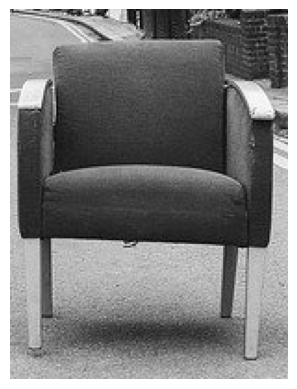

In [13]:
# Show a portion of the gray image
slice_gray = img_gray[150:350, 250:400]
plt.imshow(slice_gray, cmap='gray')
plt.axis('off')
plt.show()

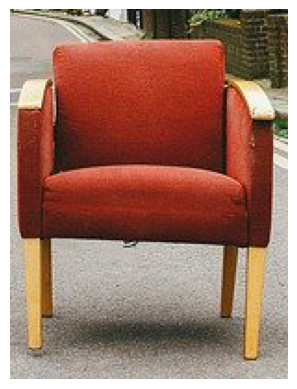

In [14]:
# Show a portion of the color image
slice_color = img_color[150:350, 250:400, :]
plt.imshow(slice_color)
plt.axis('off')
plt.show()

Using threshold: 0.471


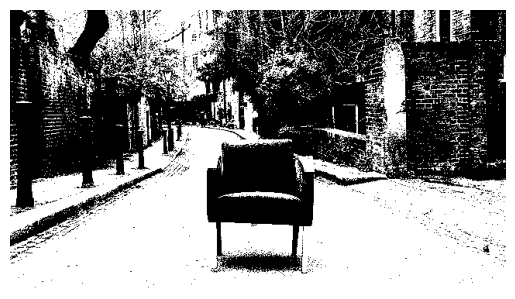

In [21]:
# Create a BW image
threshold = img_gray.mean()
print(f"Using threshold: {threshold:5.3f}", )
img_bw = img_gray > threshold

# Show image
plt.imshow(img_bw, cmap='gray')
plt.axis('off')
plt.show()

/tmp/ipykernel_16644/1922707383.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


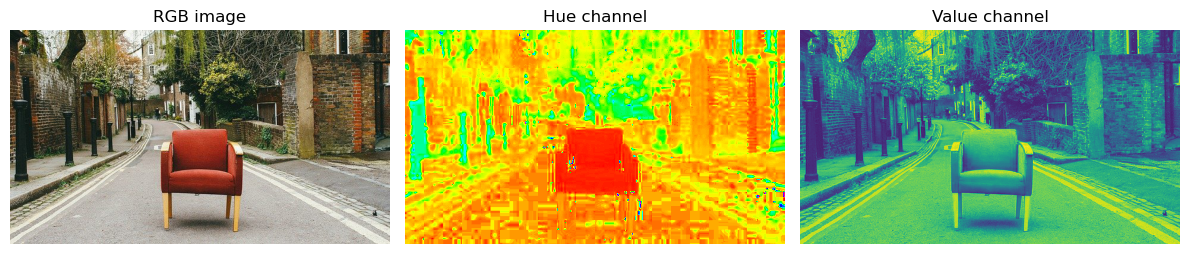

In [22]:
# Change color space
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(img_color)
hue_img = hsv_img[:, :, 0]
val_img = hsv_img[:, :, 2]

# Show them
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 3))

ax0.imshow(img_color)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(val_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
fig.show()

In [24]:
# Transforms
from skimage.transform import rescale, resize, rotate

# Rescale
down = rescale(img_gray, 0.25, anti_aliasing=False)
up   = rescale(img_gray, 2.25, anti_aliasing=False)
print(f"Size of downscaled image: {down.shape}")
print(f"Size of upscaled image: {up.shape}")

# Resize
img_color2 = resize(img_color, [600, 2400, 3])
img_color3 = resize(img_color, [800, 800, 3])
print(f"Size of resized image v1: {img_color2.shape}")
print(f"Size of resized image v2: {img_color3.shape}")

# Rotate
rotated = rotate(img_color, 30 )
print(f"Size of rotated image: {rotated.shape}")

Size of downscaled image: (90, 160)
Size of upscaled image: (810, 1440)
Size of resized image v1: (600, 2400, 3)
Size of resized image v2: (800, 800, 3)
Size of rotated image: (360, 640, 3)


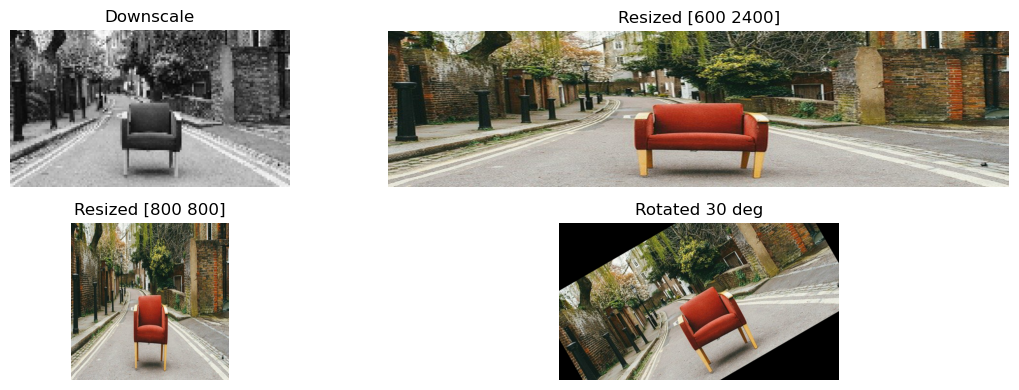

In [26]:
# Show them
plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.imshow(down, cmap='gray')
plt.title("Downscale")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(img_color2)
plt.title("Resized [600 2400]")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(img_color3)
plt.title("Resized [800 800]")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(rotated, cmap='gray')
plt.title("Rotated 30 deg")
plt.axis('off')


plt.tight_layout()
plt.show()

(400, 600, 3)
(300, 451, 3)


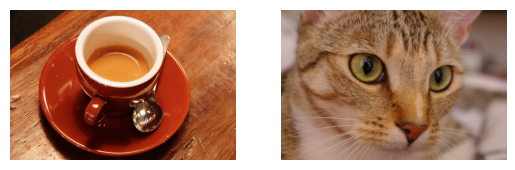

In [27]:
# Blend two images
from skimage import data

img1 = data.coffee()
img2 = data.chelsea()

print(img1.shape)
print(img2.shape)

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.show()

In [28]:
# Put both at same size
img1 = resize(img1, [300, 450])
img2 = resize(img2, [300, 450])

print(img1.shape)
print(img2.shape)

(300, 450, 3)
(300, 450, 3)


In [32]:
img_blend2.max()

0.8361732023398085

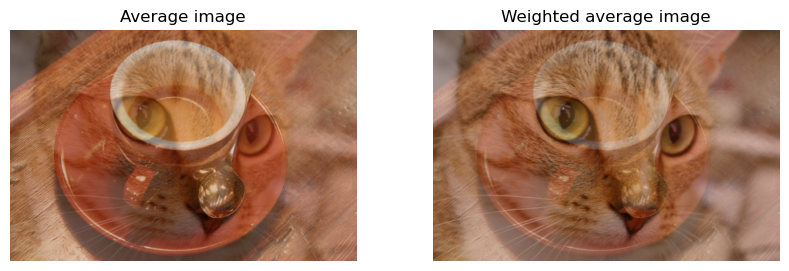

In [35]:
# Blend images
img_blend1 = 0.5 * (img1 + img2)
img_blend2 = 0.25*img1 + 0.75*img2

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Average image')
plt.imshow(img_blend1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Weighted average image')
plt.imshow(img_blend2)
plt.axis('off')
plt.show()

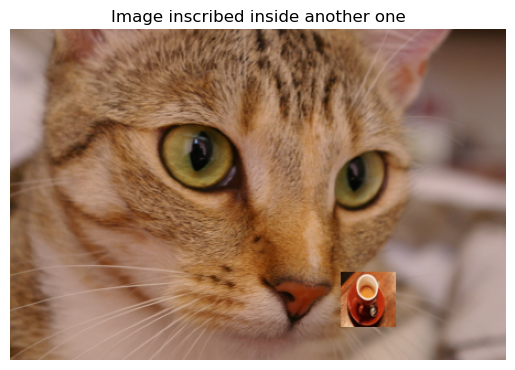

In [36]:
# Even further
img_blend3 = img2.copy()
img_blend3[220:270, 300:350, :] = resize(img1, [50, 50])

plt.imshow(img_blend3)
plt.title('Image inscribed inside another one')
plt.axis('off')
plt.show()

In [ ]:
# Load multiple images
# http://vis-www.cs.umass.edu/lfw/

In [38]:
from os import listdir
from os.path import join

In [41]:
# Read all file names in a directory
faces_path = 'Faces-subset'
file_names = [f for f in listdir(faces_path)]

print(f"There are {len(file_names)} images in the directory")
print(f"The first one is named {file_names[0]}")

There are 112 images in the directory
The first one is named George_Clooney_0003.jpg


The array with all images has shape: (112, 250, 250, 3)


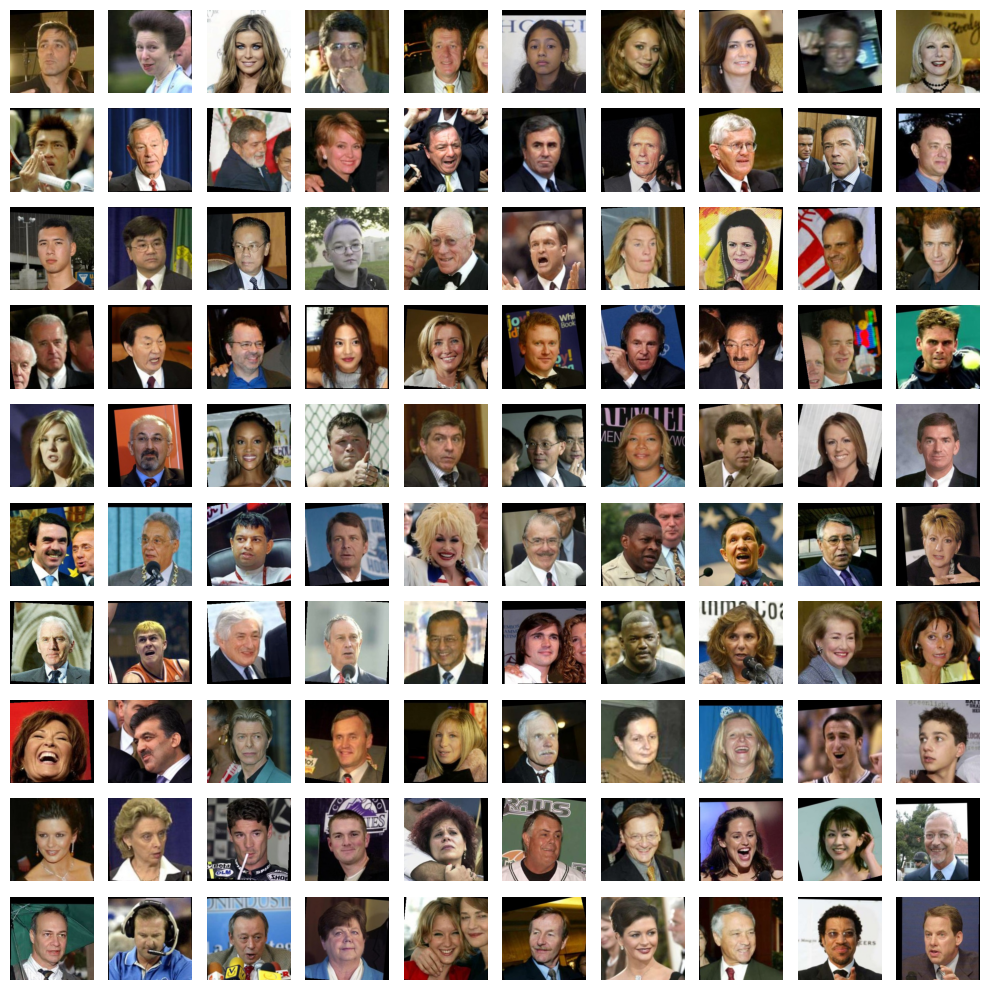

In [42]:
# Load all images into a multi-dimensional array
X = np.array([imread(join(faces_path, f)) for f in file_names])
print(f"The array with all images has shape: {X.shape}")

# Show a few of them
plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.imshow(X[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

(250, 250, 3)
(250, 250, 3)


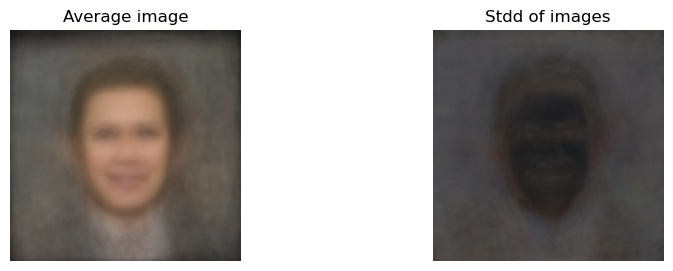

In [51]:
# Get average image
meanX = X.mean(axis=0).astype('uint8')
stddX = X.std(axis=0).astype('uint8')
print(meanX.shape)
print(meanX.shape)

# Plot average image and its standard deviation
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Average image')
plt.imshow(meanX)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Stdd of images')
plt.imshow(stddX)
plt.axis('off')
plt.show()

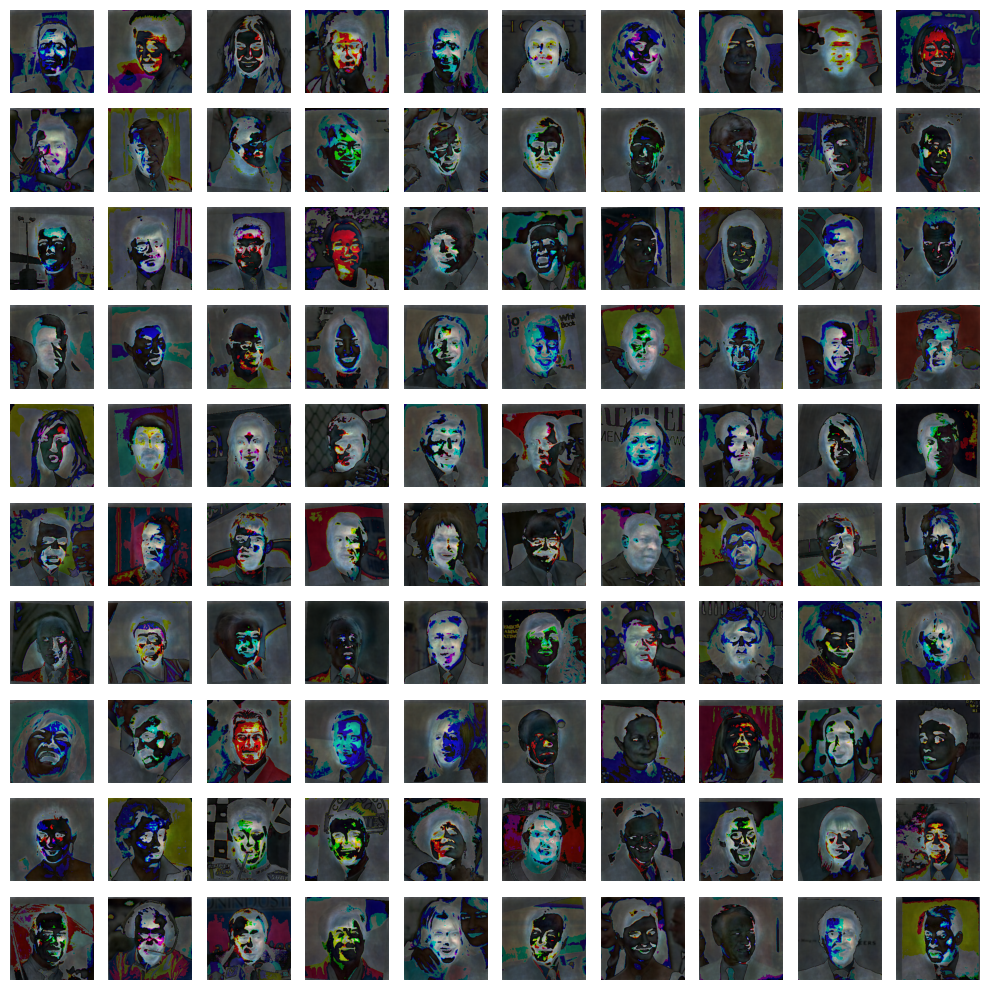

In [58]:
# Normalize images
X_norm = (X - meanX) / stddX

# And rescale their pixel values between 0 and 1
X_norm = X_norm - X_norm.min()
X_norm = X_norm / X_norm.max()

# Show a few of them
plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.imshow(X_norm[i])
  plt.axis('off')
plt.tight_layout()
plt.show()